<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkBlue;
       font-size:200%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Semana 3: Librerías de Python para tokenizar
</div> 

#### 1. Importar librerías

In [1]:
# La librería urllib permite acceder a sitios web desde python, descargar datos y 
# tramitar requerimientos de protocolo web.
import urllib.request

# Librería para protocolo de requerimientos web 
import requests

# módulo para el trabajo con url
from urllib.request import urlopen

# De la librería bs4 importar la función BeautifulSoup para extraer datos desde archivos html o XML
from bs4 import BeautifulSoup

# librería para PNL (tokenizar, stopwords y wordnet)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


#### 2. Obtener texto desde una página web (raspado o scrapping)

In [2]:
# Obtener texto desde url (scrapp o "raspar")
# con urllib se solicita requerimiento al sitio web y, la respuesta (texto) será "leída" por .read
with urllib.request.urlopen('https://www.culturagenial.com/es/cien-anos-de-soledad-de-gabriel-garcia-marquez/') as response:                   
    html = response.read()

# mostrar primeros 1000 caracteres del objeto creado mediante response.read
html[:1000]

b'<!DOCTYPE html>\n<html lang="es">\n<head>\n    <meta charset="utf-8">\n<title>Cien a\xc3\xb1os de soledad, de Garc\xc3\xada M\xc3\xa1rquez: resumen y an\xc3\xa1lisis - Cultura Genial</title>\n\n<meta http-equiv="x-ua-compatible" content="ie=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0, user-scalable=1" />\n\n    <meta name="description" content="Te presentamos el resumen y an\xc3\xa1lisis de Cien a\xc3\xb1os de soledad de Gabriel Garc\xc3\xada M\xc3\xa1rquez, as\xc3\xad como el \xc3\xa1rbol geneal\xc3\xb3gico de la familia Buend\xc3\xada.">\n\n    <meta property="og:title" content="Cien a\xc3\xb1os de soledad, de Garc\xc3\xada M\xc3\xa1rquez: resumen y an\xc3\xa1lisis">\n\n    <meta property="og:description" content="Te presentamos el resumen y an\xc3\xa1lisis de Cien a\xc3\xb1os de soledad de Gabriel Garc\xc3\xada M\xc3\xa1rquez, as\xc3\xad como el \xc3\xa1rbol geneal\xc3\xb3gico de la familia Buend\xc3\xada.">\n\n    <meta property

#### 3. Crear árbol de objetos Python para el documento HTML

El contenido de la página obtenido en el paso anterior será el que utilicemos para crear la «sopa», esto es, el árbol de objetos Python que representan al documento HTML.

In [3]:
# crear objeto soup = con BeautifulSoup sobre la entrada (html) creada con response.read
soup = BeautifulSoup(html)

# mostrar contenido del objeto soup creado
print(soup)

<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="utf-8"/>
<title>Cien años de soledad, de García Márquez: resumen y análisis - Cultura Genial</title>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0, user-scalable=1" name="viewport"/>
<meta content="Te presentamos el resumen y análisis de Cien años de soledad de Gabriel García Márquez, así como el árbol genealógico de la familia Buendía." name="description"/>
<meta content="Cien años de soledad, de García Márquez: resumen y análisis" property="og:title"/>
<meta content="Te presentamos el resumen y análisis de Cien años de soledad de Gabriel García Márquez, así como el árbol genealógico de la familia Buendía." property="og:description"/>
<meta content="https://www.culturagenial.com/es/cien-anos-de-soledad-de-gabriel-garcia-marquez/" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="https://cdn.culturagenial.com/es/imagenes/n

#### 4. Extracción del texto del documento html presente en el objeto soup creado

* Si solo se desea el texto legible por humanos dentro de un documento o etiqueta (sin el contenido de estructura html), puede usar el método get_text(). Este, devuelve todo el texto de un documento como una sola cadena Unicode (String)

In [4]:
# crear archivo string del texto presente en el html obtenido y procesado en soup
# objeto text = de la entrada definida (soup) aplicar función .get_text (strip = True)espacio en blanco . 
text = soup.get_text(strip=True)

# mostrar string de texto creada
text

'Cien años de soledad, de García Márquez: resumen y análisis - Cultura GenialLiteraturaArquitecturaPinturaCineFilosofíaCategoríasLiteraturaArquitecturaPinturaCineFilosofíaEsculturaPoesíaFrases y discursosArtes visualesMúsicaSeriesPeriodos y movimientosCultura GenialLiteraturaCien años de soledad de Gabriel García MárquezAndrea ImaginarioEspecialista en artes, literatura e historia culturalCien años de soledadse ha convertido en la novela más emblemática de la cultura latinoamericana. Escrita por Gabriel García Márquez, esta obra se inscribió en lo que para unos es realismo mágico y para Alejo Carpentier es "lo real maravilloso".En un exhaustivo trabajo de imaginación, Gabriel García Márquez narra la historia de siete generaciones de la familia Buendía, familia condenada a la soledad.Resumen deCien años de soledadLa novela está estructurada en capítulos sin nombrar. Sin embargo, para facilitar la comprensión del argumento, hemos ordenado y separado el relato en cuatro etapas que identif

#### 5. Procesamiento del texto 

* Una vez obtenido nuestro archivo de texto en formato string y depurado de contenido de estructura html procederemos a aplicar algunas funciones básicas de PNL. 

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkBlue;
       font-size:200%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        1. Tokenizar
</div> 

___

* Procederemos a dividir nuestra string de texto en unidades de trabajo (tokens o fichas). Para este ejercicio nos piden hacer la tokenización por palabras. 

* Además, crearemos función que permita almacenar los tokens en minúsculas y sin caracteres que no sean alfanuméricos. 

#### Tokenizar por palabras

In [5]:
# objeto "tokens" donde se guardarán los tokens por palabras del texto creado 
# tokens = función word_tokenize de NLTK (entrada "text", lenguaje = español)
tokens = word_tokenize(text, language='spanish')

#### Depurar tokens en minúsculas y solo caracteres alfanuméricos

In [6]:
# sobre el objeto "tokens" = colectar en [minúculas] y solo mantener caracteres alfanuméricos
tokens = [word.lower() for word in tokens if word.isalpha()]

# mostrar contenido de "tokens" luego del procesamiento 
print(tokens)

['cien', 'años', 'de', 'soledad', 'de', 'garcía', 'márquez', 'resumen', 'y', 'análisis', 'cultura', 'genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases', 'y', 'discursosartes', 'visualesmúsicaseriesperiodos', 'y', 'movimientoscultura', 'genialliteraturacien', 'años', 'de', 'soledad', 'de', 'gabriel', 'garcía', 'márquezandrea', 'imaginarioespecialista', 'en', 'artes', 'literatura', 'e', 'historia', 'culturalcien', 'años', 'de', 'soledadse', 'ha', 'convertido', 'en', 'la', 'novela', 'más', 'emblemática', 'de', 'la', 'cultura', 'latinoamericana', 'escrita', 'por', 'gabriel', 'garcía', 'márquez', 'esta', 'obra', 'se', 'inscribió', 'en', 'lo', 'que', 'para', 'unos', 'es', 'realismo', 'mágico', 'y', 'para', 'alejo', 'carpentier', 'es', 'lo', 'real', 'maravilloso', 'un', 'exhaustivo', 'trabajo', 'de', 'imaginación', 'gabriel', 'garcía', 'márquez', 'narra', 'la', 'historia', 'de', 'siete', 'generaciones', 'de', 'la', 'famil

#### Hallar frecuencia de los tokens en el texto

In [7]:
# objeto para frecuencia_de_palabras "fp" = aplicar función .FreqDist sobre (entrada "tokens")
fp = nltk.FreqDist(tokens)

# función para mostrar contenido de cada token y su valor de frecuencia en el texto
# para cada token y valor (frecuencia) en fp.items (lista creada por FreqDist previamente)
for key,val in fp.items():
    # mostrar key (contenido de token) + separador ":" + valor frecuencia
    print (str(key) + ':' + str(val))

cien:5
años:21
de:170
soledad:8
garcía:19
márquez:12
resumen:3
y:68
análisis:4
cultura:5
genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases:1
discursosartes:1
visualesmúsicaseriesperiodos:1
movimientoscultura:1
genialliteraturacien:1
gabriel:11
márquezandrea:1
imaginarioespecialista:1
en:54
artes:2
literatura:4
e:2
historia:11
culturalcien:1
soledadse:1
ha:5
convertido:1
la:85
novela:5
más:10
emblemática:1
latinoamericana:1
escrita:1
por:21
esta:6
obra:3
se:34
inscribió:1
lo:15
que:44
para:13
unos:3
es:16
realismo:2
mágico:2
alejo:2
carpentier:3
real:4
maravilloso:4
un:35
exhaustivo:1
trabajo:1
imaginación:2
narra:1
siete:1
generaciones:1
familia:6
buendía:11
condenada:1
a:50
decien:3
soledadla:1
está:2
estructurada:1
capítulos:1
sin:4
nombrar:1
embargo:1
facilitar:1
comprensión:1
del:32
argumento:1
hemos:1
ordenado:1
separado:1
el:71
relato:5
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
los:29
pasajes:1
etapa

#### Crear gráfico de frecuncias de tokens 

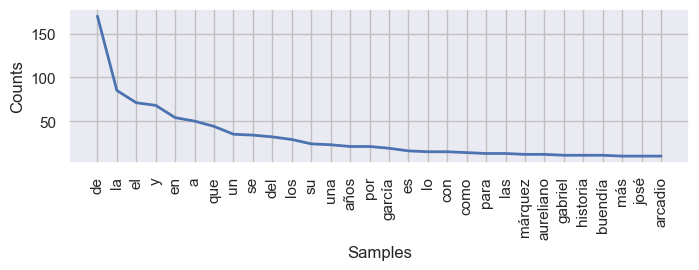

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot del objeto "fp" (ver 30 primeros tokens de la lista de frecuencia, no acumular valores) 
fp.plot(30, cumulative=False)

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkBlue;
       font-size:200%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        2. Stopwords
</div> 

#### Remover del texto las Stopwords 

In [9]:
# Crear función que depure el texto de stopwords 

# Objeto "clean_tokens" será creado a partir de una lista del objeto "tokens"
clean_tokens = tokens[:]
# para cada token en "tokens"
for token in tokens:
    # si token está en el diccionario de stopwords en español de NLTK
    if token in stopwords.words('spanish') :
        # entonces remover token de la lista
        clean_tokens.remove(token)
        
# Mostrar objeto "clean_tokens"
print(clean_tokens)

['cien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisis', 'cultura', 'genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases', 'discursosartes', 'visualesmúsicaseriesperiodos', 'movimientoscultura', 'genialliteraturacien', 'años', 'soledad', 'gabriel', 'garcía', 'márquezandrea', 'imaginarioespecialista', 'artes', 'literatura', 'historia', 'culturalcien', 'años', 'soledadse', 'convertido', 'novela', 'emblemática', 'cultura', 'latinoamericana', 'escrita', 'gabriel', 'garcía', 'márquez', 'obra', 'inscribió', 'realismo', 'mágico', 'alejo', 'carpentier', 'real', 'maravilloso', 'exhaustivo', 'trabajo', 'imaginación', 'gabriel', 'garcía', 'márquez', 'narra', 'historia', 'siete', 'generaciones', 'familia', 'buendía', 'familia', 'condenada', 'decien', 'años', 'soledadla', 'novela', 'estructurada', 'capítulos', 'nombrar', 'embargo', 'facilitar', 'comprensión', 'argumento', 'ordenado', 'separado', 'relato', 'cuatro',

#### Crear frecuencia de tokens sin Stopwords

In [10]:
# objeto "freq_clean" = función .FreqDist sobre la entrada ("clean_tokens") 
freq_clean = nltk.FreqDist(clean_tokens)
# mostrar contenido del token separado por ":" y seguido por su valor (frecuencia)
for key,val in freq_clean.items() :
    print(str(key) + ':' + str(val))

cien:5
años:21
soledad:8
garcía:19
márquez:12
resumen:3
análisis:4
cultura:5
genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases:1
discursosartes:1
visualesmúsicaseriesperiodos:1
movimientoscultura:1
genialliteraturacien:1
gabriel:11
márquezandrea:1
imaginarioespecialista:1
artes:2
literatura:4
historia:11
culturalcien:1
soledadse:1
convertido:1
novela:5
emblemática:1
latinoamericana:1
escrita:1
obra:3
inscribió:1
realismo:2
mágico:2
alejo:2
carpentier:3
real:4
maravilloso:4
exhaustivo:1
trabajo:1
imaginación:2
narra:1
siete:1
generaciones:1
familia:6
buendía:11
condenada:1
decien:3
soledadla:1
estructurada:1
capítulos:1
nombrar:1
embargo:1
facilitar:1
comprensión:1
argumento:1
ordenado:1
separado:1
relato:5
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundación:1
primeros:1
macondodesde:1
úrsula:5
iguarán:1
casó:1
primo:1
josé:10
arcadio:10
teme:1
engendrar:1
niño:4
cola:2
cerdo:2
consecuenci

#### Crear gráfica para mostrar frecuencia de tokens sin stopwords

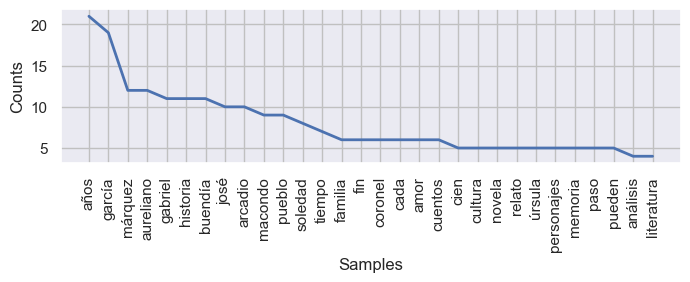

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot del objeto "freq_clean" (30 primeros tokens lista de frecuencia, no acumular valores) 
freq_clean.plot(30, cumulative=False)


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkBlue;
       font-size:200%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        3. Sinónimos
</div> 

#### Definir lista de sinónimos desde wordnet

In [12]:
# Establecer lista de sinónimos de wordnet "esp" como diccionario para reemplazar sinónimos en texto
synonyms = []
for syn in wordnet.synsets('spa') :
    for lemma in syn.lemmas('spa') :
        synonyms.append(lemma.name())

# mostrar ejemplo de sinónimos
synonyms

['abrevadero',
 'balneario',
 'spa',
 'balneario',
 'complejo_hotelero',
 'gimnasio',
 'spa']

In [13]:
# crear función para reemplazar una palabra token con su sinónimo de wordnet
for ind,sin in enumerate(synonyms) :
     clean_tokens_sin = [word.replace(synonyms[ind],'familia') for word in clean_tokens]
        
print(clean_tokens_sin)

['cien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisis', 'cultura', 'genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases', 'discursosartes', 'visualesmúsicaseriesperiodos', 'movimientoscultura', 'genialliteraturacien', 'años', 'soledad', 'gabriel', 'garcía', 'márquezandrea', 'imaginarioespecialista', 'artes', 'literatura', 'historia', 'culturalcien', 'años', 'soledadse', 'convertido', 'novela', 'emblemática', 'cultura', 'latinoamericana', 'escrita', 'gabriel', 'garcía', 'márquez', 'obra', 'inscribió', 'realismo', 'mágico', 'alejo', 'carpentier', 'real', 'maravilloso', 'exhaustivo', 'trabajo', 'imaginación', 'gabriel', 'garcía', 'márquez', 'narra', 'historia', 'siete', 'generaciones', 'familia', 'buendía', 'familia', 'condenada', 'decien', 'años', 'soledadla', 'novela', 'estructurada', 'capítulos', 'nombrar', 'embargo', 'facilitar', 'comprensión', 'argumento', 'ordenado', 'separado', 'relato', 'cuatro',

In [14]:
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items() :
    print(str(key) + ':' + str(val))

cien:5
años:21
soledad:8
garcía:19
márquez:12
resumen:3
análisis:4
cultura:5
genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases:1
discursosartes:1
visualesmúsicaseriesperiodos:1
movimientoscultura:1
genialliteraturacien:1
gabriel:11
márquezandrea:1
imaginarioespecialista:1
artes:2
literatura:4
historia:11
culturalcien:1
soledadse:1
convertido:1
novela:5
emblemática:1
latinoamericana:1
escrita:1
obra:3
inscribió:1
realismo:2
mágico:2
alejo:2
carpentier:3
real:4
maravilloso:4
exhaustivo:1
trabajo:1
imaginación:2
narra:1
siete:1
generaciones:1
familia:6
buendía:11
condenada:1
decien:3
soledadla:1
estructurada:1
capítulos:1
nombrar:1
embargo:1
facilitar:1
comprensión:1
argumento:1
ordenado:1
separado:1
relato:5
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundación:1
primeros:1
macondodesde:1
úrsula:5
iguarán:1
casó:1
primo:1
josé:10
arcadio:10
teme:1
engendrar:1
niño:4
cola:2
cerdo:2
consecuenci

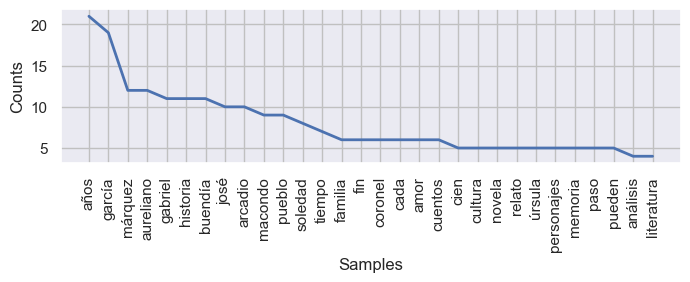

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# con SeaBorn se configura argumentos del plot
sns.set()

# Establecer tamaño del plot en unidades de pulgadas (ancho, alto)
plt.figure(figsize=[8,2])

# crear plot objeto "freq_clean_sin" (30 primeros tokens lista de frecuencia, no acumular valores) 
freq_clean_sin.plot(30, cumulative=False)

# freq_clean_sin.plot(30, cumulative=False)